In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6948,2750-BJLSB,Female,0,No,No,47,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,103.70,4730.6,No
6209,3417-TSCIC,Male,0,No,No,29,No,No phone service,DSL,No,...,No,No,No,No,One year,Yes,Mailed check,24.85,788.05,No
446,4110-PFEUZ,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,69.55,69.55,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
2606,1550-EENBN,Female,0,No,No,31,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,104.35,3205.6,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df.iloc[488]['TotalCharges']

' '

In [7]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\mdipa\AppData\Local\Temp\ipykernel_18592\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [9]:
df1.TotalCharges.dtypes

dtype('float64')

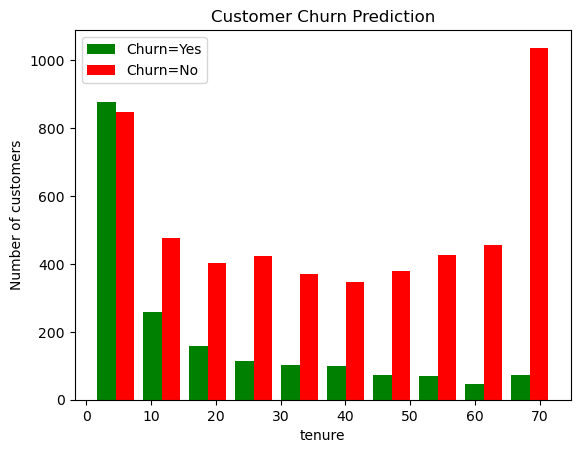

In [10]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

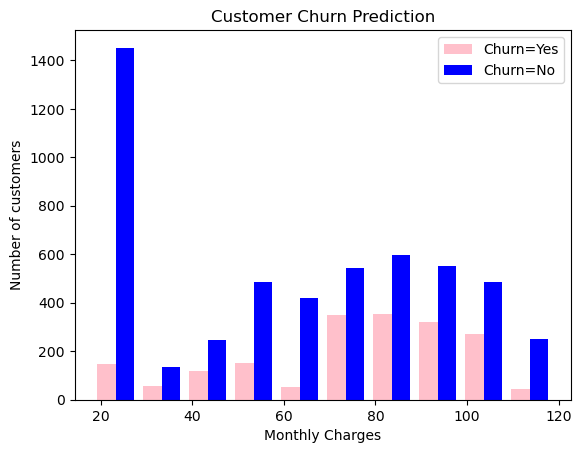

In [11]:
MonthlyCharges_churn_no=df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction")
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],color=['pink','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
# for one hot encoding(categorical columns)

In [13]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print (f'{column}:{df[column].unique()}')

In [14]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [15]:
df1.replace('No internet service','No',inplace=True)# data cleaning
df1.replace('No phone service','No',inplace=True)

C:\Users\mdipa\AppData\Local\Temp\ipykernel_18592\3161737586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)# data cleaning
C:\Users\mdipa\AppData\Local\Temp\ipykernel_18592\3161737586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [16]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [17]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [18]:
for col in yes_no_cols:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\mdipa\AppData\Local\Temp\ipykernel_18592\2849318805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [19]:
for col in df1:
     print (f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [20]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\mdipa\AppData\Local\Temp\ipykernel_18592\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [21]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1999,0,0,0,0,23,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
634,1,0,0,0,40,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
6645,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6556,1,0,1,1,6,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6120,0,0,0,0,6,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']#not in 0 and 1 range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [25]:
for col in df2:
     print (f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [26]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [28]:
len(X_train.columns)

26

In [40]:
y_test.value_counts()

0    1267
1     491
Name: Churn, dtype: int64

In [29]:
import tensorflow as tf
from tensorflow import keras

-




Epoch 1/100


165/165 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7454
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7926
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8007
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8039
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8085
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8104
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8085
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8119
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8119
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4032 - a

In [30]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7719


[0.4754716455936432, 0.7718998789787292]

In [31]:
yp=model.predict(X_test)
yp[:5]

55/55 [==============================] - 0s 1ms/step


array([[0.1455329 ],
       [0.64554405],
       [0.01002731],
       [0.9126287 ],
       [0.427558  ]], dtype=float32)

In [32]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [33]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1267
           1       0.60      0.53      0.57       491

    accuracy                           0.77      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.76      0.77      0.77      1758



Text(50.722222222222214, 0.5, 'Truth')

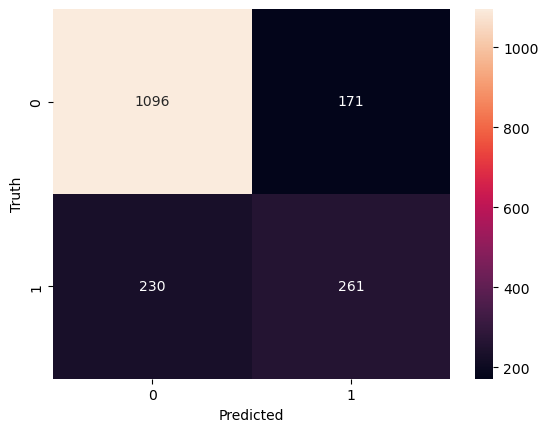

In [36]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
accuracy=round((1110+234)/(1110+234+157+257),2)
accuracy

0.76

### precision for 0 class i.e. Precision for customers who did not churn

In [38]:
round(1110/(1110+257),2)

0.81

In [39]:
# recall for 0 class
round(1110/(1110+157),2)

0.88

### handling this imbalanced dataset to improve the f1 score

In [42]:
#class count
count_class_0,count_class_1=df1.Churn.value_counts()
# devide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

## Undersampling

In [47]:
count_class_0,count_class_1

(5163, 1869)

In [43]:
df_class_0.shape

(5163, 27)

In [44]:
df_class_1.shape

(1869, 27)

In [49]:
# undersampling the 0th class
df_class_0.sample(count_class_1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3818,1,0,1,0,0.802817,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
5230,0,0,1,1,0.802817,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1546,1,0,0,0,0.830986,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4006,0,0,1,1,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
31,0,1,1,0,0.014085,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,0,0,1,1,0.873239,0,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
6042,1,1,1,0,0.507042,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4284,1,1,0,0,0.436620,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2369,0,0,0,0,0.887324,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [50]:
df_class_0_under=df_class_0.sample(count_class_1)

In [52]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

In [53]:
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
626,0,0,1,0,0.309859,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6664,1,0,0,0,0.492958,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
2657,1,0,0,0,0.394366,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
903,1,0,1,0,0.774648,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
2306,1,0,0,0,0.028169,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [54]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [56]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [57]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [58]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

## Printing Classification in the last, Scroll down till the last epoch to watch the classification report



In [59]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5869 - accuracy: 0.7057
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7552
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7645
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7729
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8174
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8157
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8151
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8217
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8120
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8191
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8211
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8204
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8227
Epoch 93/100


## 2. Oversampling

In [60]:
count_class_0,count_class_1

(5163, 1869)

In [63]:
df_class_1.shape

(1869, 27)

In [66]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [67]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10326, 27)

In [68]:
print('Random under-sampling:')
print(df_test_over.Churn.value_counts())

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [69]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [70]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5773 - accuracy: 0.6983
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4934 - accuracy: 0.7584
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4856 - accuracy: 0.7623
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.7682
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.7717
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7741
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7765
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7748
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4613 - accura

## 3. SMOTE

In [73]:
X=df2.drop('Churn',axis=1)
y=df2['Churn']

In [74]:
pip install imbalanced.learn


Note: you may need to restart the kernel to use updated packages.


In [75]:
from imblearn.over_sampling import SMOTE

In [78]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [81]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [82]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [83]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5200 - accuracy: 0.7518
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.7783
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.7774
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.7815
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7873
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7914
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4428 - accuracy: 0.7910
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7946
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7959
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4324 - accura

## 4.Use of Ensemble with undersampling

In [84]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [85]:
X=df2.drop('Churn',axis=1)
y=df2['Churn']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [87]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [88]:
4130/1495

2.762541806020067

In [89]:
4130/3

1376.6666666666667

In [90]:
df3=X_train.copy()
df3['Churn']=y_train

In [91]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [92]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [102]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis=1)
    y_train=df_train['Churn']
    return X_train,y_train

In [103]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1495)
X_train.shape

(2990, 26)

In [104]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6047 - accuracy: 0.6910
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7669
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7699
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8177
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8191
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8191
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8201
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8207
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8187
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8207
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8177
Epoch 93/100


In [105]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6381 - accuracy: 0.6736
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7622
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8124
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8134
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8130
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8140
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8137
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8130
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8194
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8207
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8104
Epoch 93/100


In [108]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.6907
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7765
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7784
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7761
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7806
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8425
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8459
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8410
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8482
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8429
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8448
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8440
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8463
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8459
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8490
Epoch 93/100


In [109]:
len(y_pred1)

1407

In [110]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [111]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1033
           1       0.46      0.80      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.71      1407



### f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes